In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

X.shape: (26, 2)
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


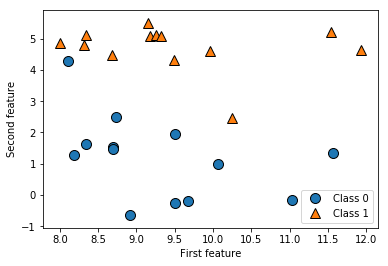

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
print(X)


Text(0,0.5,'Target')

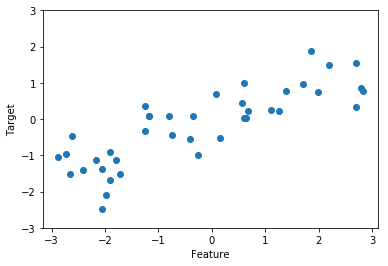

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys() :\n{}'.format(cancer.keys()))

cancer.keys() :
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
np.bincount(cancer.target)

array([212, 357])

In [7]:
print('Sample counts per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))
boston.feature_names

Data shape: (506, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


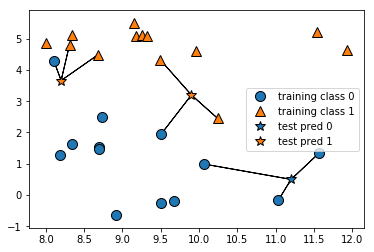

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
# 用scikit-learn来应用k近邻算法
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# train_test_split 将input分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
# 训练
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
print('测试集预测结果：{}'.format(clf.predict(X_test)))
print('测试集预测准确性：{:.2f}'.format(clf.score(X_test, y_test)))

测试集预测结果：[1 0 1 0 1 0 0]
测试集预测准确性：0.86


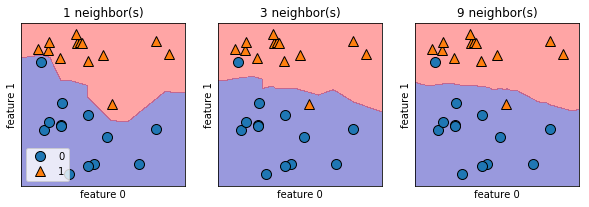

In [15]:
#决策边界
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# print(fig, axes)
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
    
    
    
    


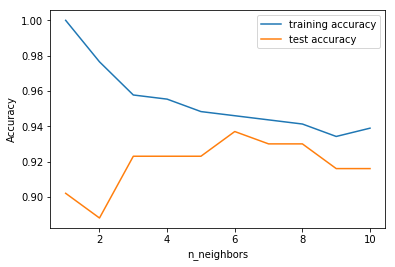

In [16]:
#模型复杂度和泛化能力之间的关系
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = \
train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
    
    
    
    
    
    
    
    
    
    
    
    
    
    

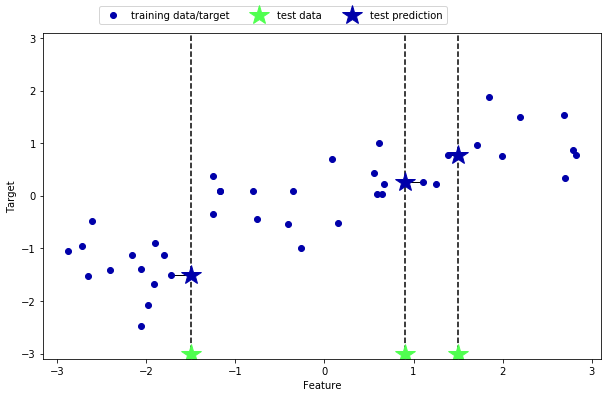

In [17]:
#k近邻回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

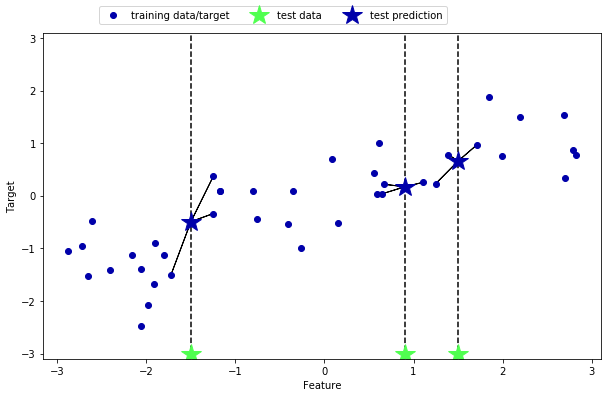

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# 讲wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标值来拟合模型
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [20]:
print("测试集预测结果: \n{}".format(reg.predict(X_test)))
print(y_test)

测试集预测结果: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


In [21]:
print("测试集 R2分数：{:2f}".format(reg.score(X_test, y_test)))

测试集 R2分数：0.834417


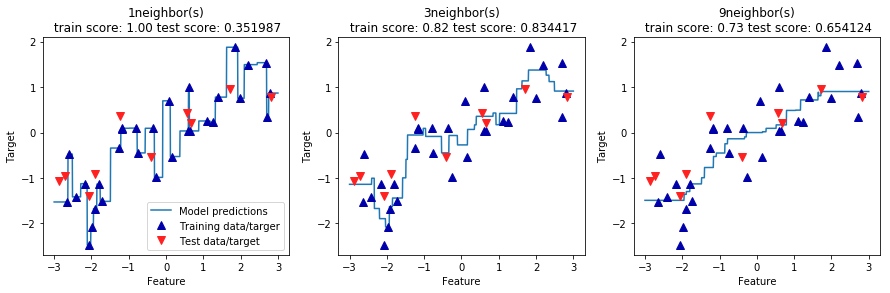

In [22]:
# 分析KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点， 在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 利用1个，3个或9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{}neighbor(s)\n train score: {:.2f} test score: {:2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/targer", "Test data/target"], loc="best")






















/Users/John/python_project/deeplearning/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


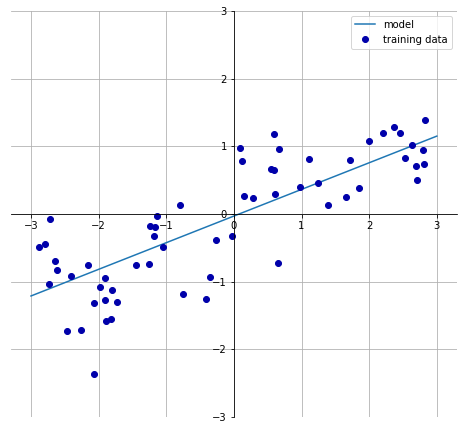

In [23]:
#线性模型
mglearn.plots.plot_linear_regression_wave()

In [24]:
#线性回归
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [25]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [26]:
#线性回归在训练集和测试集上的性能
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# 训练集和测试集分数非常接近，一般为欠拟合

Training set score: 0.67
Test set score: 0.66


In [27]:
# 用波士顿房价数据预测
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# 训练集上非常准确，但是测试集上表现不行， 一般是过拟合， 需要正则化

Training set score: 0.95
Test set score: 0.61


In [28]:
# 岭回归 L2正则化
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# 过拟合症状好些了

Training set score: 0.89
Test set score: 0.75


In [29]:
# 试着调节alpha
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
# 将alpha改大了 效果更不好了

Training set score: 0.79
Test set score: 0.64


In [30]:
# 调小alpha
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
# alpha为0.1 貌似效果不错

Training set score: 0.93
Test set score: 0.77


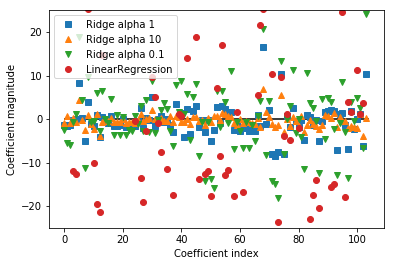

In [31]:
plt.plot(ridge.coef_, 's', label="Ridge alpha 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

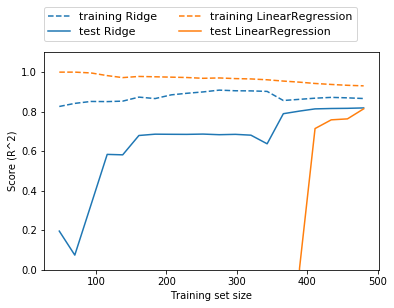

In [32]:
mglearn.plots.plot_ridge_n_samples()

In [33]:
# L1 正则化
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [34]:
# 增大max_iter的值
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [35]:
# 如果把alpha设得过小， 就会消除正则化的效果， 并出现过拟合
# 增大max_iter的值
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


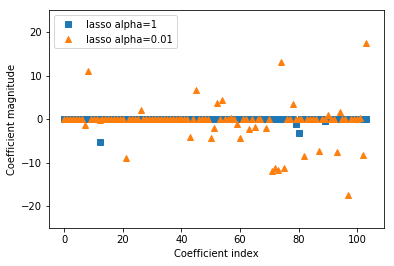

In [36]:
plt.plot(lasso.coef_, 's', label="lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="lasso alpha=0.01")
# plt.plot(lasso00001.coef_, 'v', label="lasso alpha=0.00001")
# plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

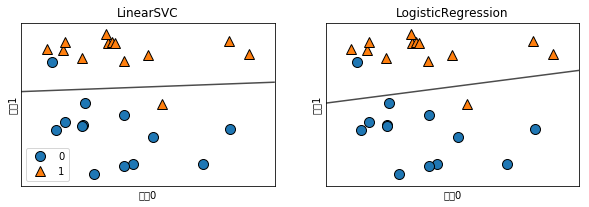

In [37]:
#逻辑回归和SVM 应用到forge数据上
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for modele, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = modele.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("特征0")
    ax.set_ylabel("特征1")
axes[0].legend()






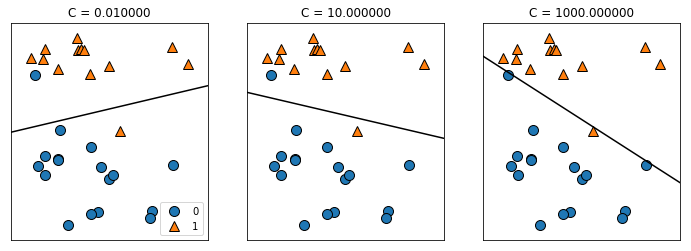

In [38]:
# 决定正则化强度的权衡参数C
mglearn.plots.plot_linear_svc_regularization()

In [39]:
# 乳腺癌数据上分析LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [40]:
# 增大C值
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [41]:
# 减少C值
logreg001 = LogisticRegression(C=.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


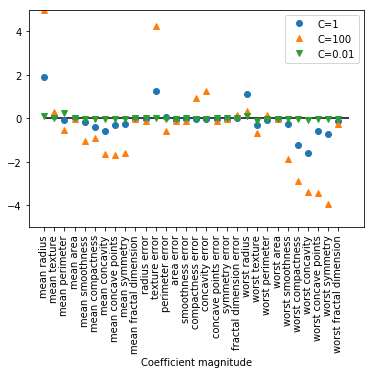

In [42]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.xlabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

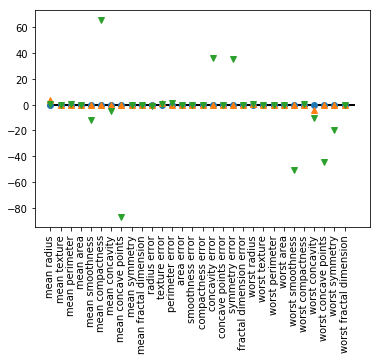

In [43]:
# L1正则化逻辑回归能更好的看清楚哪个特征与结果的关联度更大
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))


    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])

plt.xlabels("Coefficient index")
plt.xlabels("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)





In [ ]:
# 多分类的线性模型

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Fearure 1")
plt.legend(["Class 0", "Class 1", "Class 2",])

In [ ]:
# 训练一个LinearSVC分类器
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

    
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))

In [ ]:
# 朴素贝叶斯分类器
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

print(np.unique(y))

















In [ ]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))




In [ ]:
# 树深度为4
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


In [ ]:
# 分析决策树
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, 
               impurity=False, filled=True)





In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)
    
    

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone
print(tree)

In [45]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

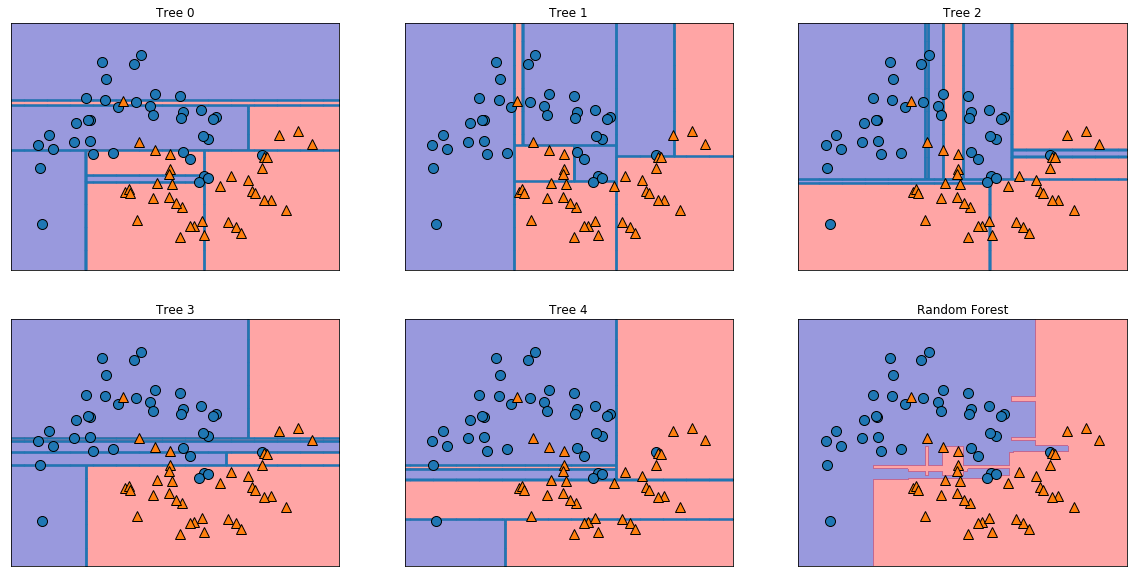

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [47]:
# 100棵树的随机森林应用在乳腺癌数据集上
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [49]:
plot_feature_importances_cancer(forest)

NameError: name 'plot_feature_importances_cancer' is not defined

Text(0,0.5,'Feature 1')

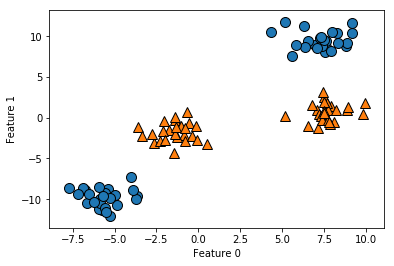

In [60]:
# 核支持向量机
# from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

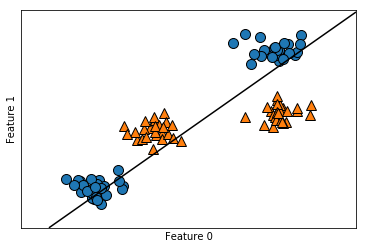

In [61]:
# 用线性模型无法给出较好的结果
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'Feature 1 ** 2')

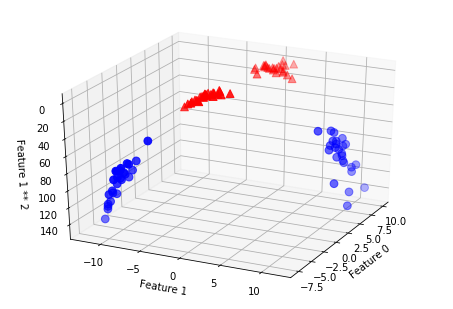

In [66]:
# 添加第二个特征的平方，作为一个新特征
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3D 可视化
ax = Axes3D(figure, elev=-152, azim=-26)
# 首先画出所有y==0的点，然后画出所有y==1的点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")


In [74]:
m1 = 1
m2 = 0
m3 = 3
print(~m1)
print(~m2)
print(~m3)

-2
-1
-4


In [77]:
# 深度学习
# display(mglearn.plots.plot_logistic_regression_graph())

Text(0,0.5,'relu(x), tanh(x)')

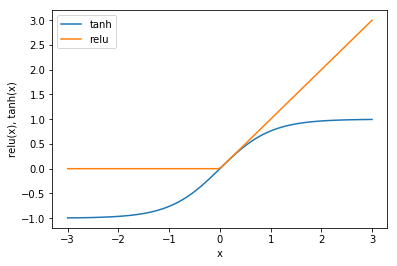

In [97]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0.5,0,'Feature 1')

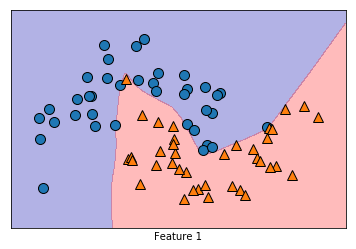

In [127]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0.5,0,'Feature 1')

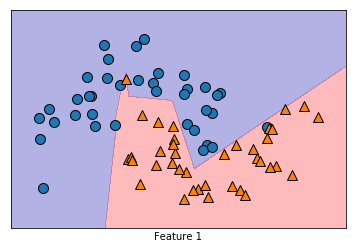

In [128]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")


Text(0.5,0,'Feature 1')

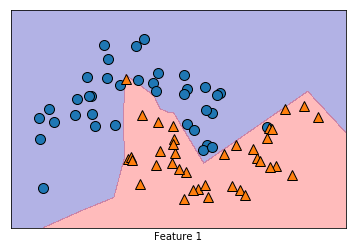

In [129]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")


Text(0.5,0,'Feature 1')

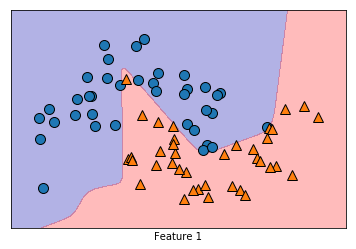

In [130]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")


In [131]:
# 神经网络应用在乳腺癌数据上

print("cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("训练集上准确率：{:.2f}".format(mlp.score(X_train, y_train)))
print("测试集上准确率：{:.2f}".format(mlp.score(X_test, y_test)))


cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
训练集上准确率：0.91
测试集上准确率：0.88


In [132]:
# 计算训练集中每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算训练集中每个特征的标准差
std_on_train = X_train.std(axis=0)

# 减去平均值，然后乘以标准差的倒数
# 如此运算以后， mean=0， std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 测试集做相同的变换
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))



0.9906103286384976
0.965034965034965


/Users/John/python_project/deeplearning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [133]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))


0.9929577464788732
0.972027972027972


In [134]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


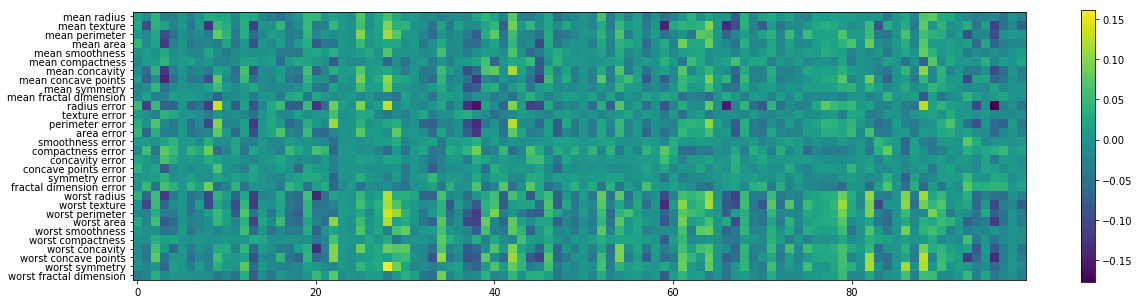

In [136]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

In [148]:
# 分类器的不确定度估计
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue","red"])[y]
print(y)
print(y_named)
# print(X.shape)
# print(y.shape)
# plt.scatter(X[:, 0], X[:, 1], y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]
['red' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'red'
 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue' 'blue'
 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue'
 'blue']


In [158]:
x = np.array([1,0,1,1,1])
m = np.array(['blue', 'red'])[x]
print(m)

['red' 'blue' 'red' 'red' 'red']


In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

#构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)




GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [162]:
print("X_test.shape {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))


X_test.shape (25, 2)
Decision function shape: (25,)


In [163]:
# 显示decision_fn的前几个元素
print("Decision function:\n {}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [164]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
